# Train the model using the ArcGIS API for Python

### Prepare training sample data

After creating training sample data, you typically have to prepare this data by splitting it into training and validation sets, applying data augmentation techniques, and creating batches for computer memory management. The ArcGIS API `prepare_data` method can automate this entire process. It uses a default set of transformations to augment the training sample data. You can specify your own transformations or keep the defaults.

In [1]:
# Import the required packages
from arcgis.learn import SingleShotDetector, prepare_data

In [3]:
# Load the image chips into memory
data_path = r'C:\Users\AFC\Documents\EsriTraining\ObjectDetection\ImageChips' 
# data_path = r'C:\Users\Student\Documents\ObjectDetection\ImageChips'

# Run the prepare_data method, specifying the class value and name but leaving the default transformations
data = prepare_data(data_path, {0:'Pool'})
data.classes

Cuda is not available


['background', 'Pool']

### Visualize the augmented training sample data
The`.show_batch()` method will visualize the exported training samples and their labels after applying the data augmentation transformations.

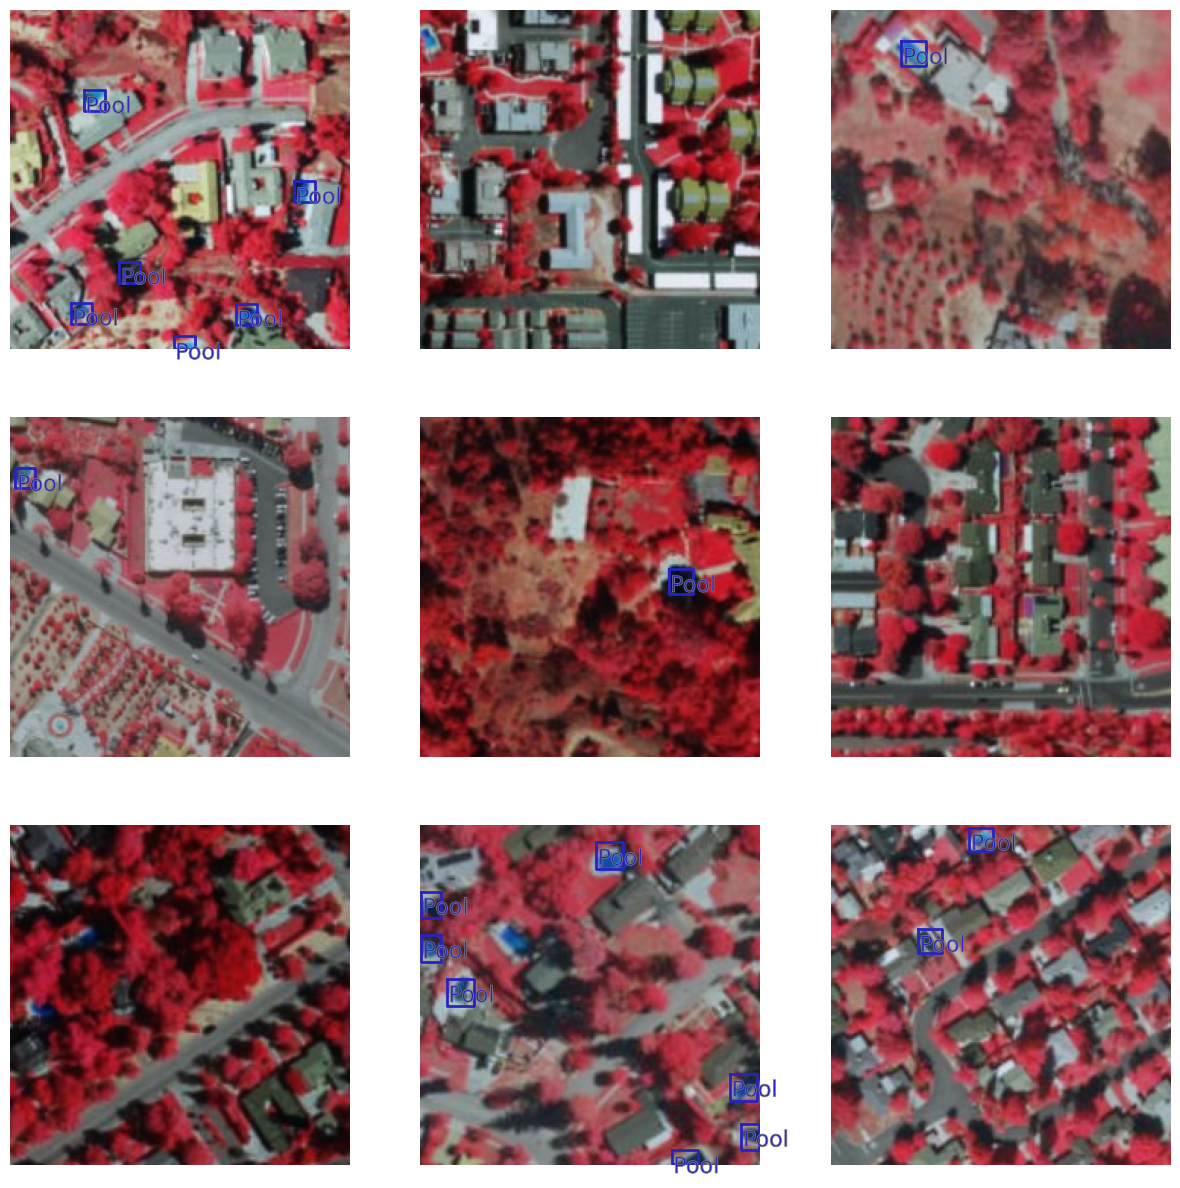

In [4]:
# Show a random sample of image chips
data.show_batch()

### Define the deep learning model architecture
`arcgis.learn` includes deep learning models that use pretrained Convolutional Neural Networks (CNNs). You will use the Single-Shot Detector (SSD). SSD is one of the most advanced object detection algorithms and is based on a pretrained CNN. An SSD model architecture has been predefined in `arcgis.learn`. For more information about SSD and its integration into `arcgis.learn,` see ArcGIS API for Python Help: How single-shot detector (SSD) works? (https://developers.arcgis.com/python/guide/how-ssd-works/).

In [5]:
# Create the Single-Shot Detector model
ssd = SingleShotDetector(data)

### Find an optimal learning rate
The learning rate controls the weighting adjustment of the neural network. A low learning rate trains the model slowly, while a high learning rate can jump to conclusions and learn the incorrect information. The ArcGIS Python API provides a learning rate finder that finds a rate where loss, or model error, is lowest before it starts to increase again, indicating that the learning rate is too high and introducing error into the model. 

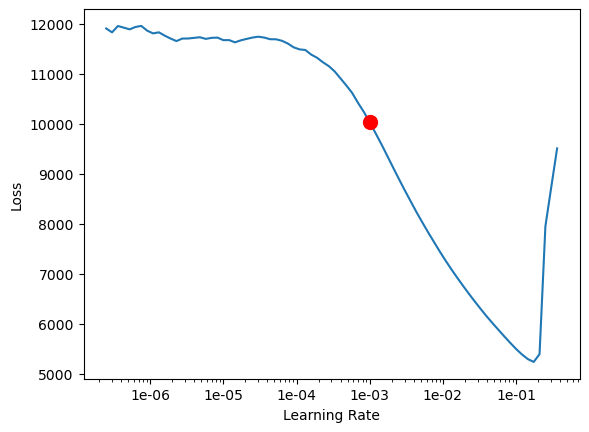

0.001

In [6]:
# Find the optimum learning rate using the learning rate finder
ssd.lr_find()

Based on the learning rate plot above, the loss decreases dramatically at 1e-3 (0.001), so you will use this rate for training.

In [ ]:
# Train the SSD model for 25 epochs, using a learning rate of 0.001
ssd.fit(25, lr=1e-3)

### Review the model
Comparing the ground truth images with the predicted images will help you determine the accuracy of your model. 

In [ ]:
# Display the results of the trained SSD model on a part of the validation set
ssd.show_results()

In [ ]:
# Plot the training and validation losses
ssd.plot_losses()

In [ ]:
# Print the average precision score of the model
ssd.average_precision_score()

This model provides a good baseline, predicting most of the pools identified in the ground truth. You could modify the parameters of this tool (number of epochs, grid cell size, and so on) to improve the results of the model. Because these modifications would require more processing time, you will proceed with this model.  

### Save the model

The .save below creates an Esri Model Definition (.emd) file, which contains the information required to run inferencing tools for detecting objects, classifying objects, or classifying pixels.

In [ ]:
# Save the model, which you can use as input to the Detect Objects Using Deep Learning tool in ArcGIS Pro
ssd.save(r'C:\Users\AFC\Documents\EsriTraining\ObjectDetection\Results\PoolsModel_25_SSD_Python',save_inference_file=True) # save it to a directory of your choosing


# ssd.save(r'C:\Users\Student\Documents\ObjectDetection\PoolsModel_25_SSD_Python',save_inference_file=True)

### Perform inferencing (detect objects) in ArcGIS Pro

You have now created your training sample data using ArcGIS API for Python. 

If you would like to use this trained model to detect objects, then you can go back and repeat the steps to detect objects in ArcGIS Pro, but you will now use this EMD file. To do this, return to ArcGIS Pro and use the Detect Objects Using Deep Learning tool to extract features from the imagery. You will repeat the Perform Inferencing Using The Model step in the PDF. Replace the PoolsModel_25_SSD.emd file with the .emd file that you just saved in this notebook.

